## 1. Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from os import listdir




## 2. Loading the dataset

In [2]:
data = pd.read_csv('sales_data_TS.csv')
pd.get_option('display.max_columns', None)
data.shape

(682, 71)

#### The data has 682 entries and 71 variable


# ***

## 3. Lets take a sneek peek into the data

In [3]:
data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name
0,#TS2960,fan4fanycaduthuz@gmail.com,paid,2021-03-31 22:47:06 +0530,fulfilled,2021-03-31 23:30:56 +0530,no,INR,650.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kerala,Kerala
1,#TS2959,chhakulithakur@gmail.com,paid,2021-03-31 22:36:09 +0530,fulfilled,2021-03-31 23:30:59 +0530,no,INR,990.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maharashtra,Maharashtra
2,#TS2959,chhakulithakur@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#TS2958,charishmaeesala@gmail.com,paid,2021-03-31 21:19:21 +0530,fulfilled,2021-03-31 23:35:26 +0530,yes,INR,750.0,0.0,...,NaN,NaN,NaN,NaN,NaN,9.177318e+11,NaN,NaN,Telangana,Telangana
4,#TS2957,monjitphukan18@gmail.com,paid,2021-03-31 21:08:41 +0530,fulfilled,2021-03-31 23:30:59 +0530,yes,INR,450.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assam,Assam


#### We can see that datafile has information given for every single transaction. 

# ***

# 4. Data exploration 

#### Lets first check if we have any missing value!
#### Since our data set is quite large, I will trick into give me a summary on how much null values (missing values) the data contains.

In [4]:
null_percentage = data.isnull().sum()/data.shape[0]*100
null_percentage

Name                        0.000000
Email                       0.000000
Financial Status           36.070381
Paid at                    36.070381
Fulfillment Status         36.070381
                             ...    
Phone                      57.331378
Receipt Number            100.000000
Duties                    100.000000
Billing Province Name      36.070381
Shipping Province Name     36.070381
Length: 71, dtype: float64

#### Looks like the data has a lot of missing values, since it has 71 col its difficult to see them here. I would manually get into the file and check which are the important col for sales forecasting and will just work with them.


#### A quick look at the file and retained only required col's

In [5]:
# Reload the edited file
data = pd.read_csv('sales_data_TS_edited.csv')
pd.get_option('display.max_columns', None)
data.shape


(682, 18)

In [6]:
data.head()

,Paid at,Fulfilled at,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Billing City,Billing Province,Name
0,2021-03-31 22:47:06 +0530,2021-03-31 23:30:56 +0530,no,650.0,0.0,0.0,650.0,Standard,2021-03-31 22:47:05 +0530,1,Personalised Mens Wallet - Brown,650,0.0,TS14-MW-BROWN,True,ALUVA,KL,#TS2960
1,2021-03-31 22:36:09 +0530,2021-03-31 23:30:59 +0530,no,990.0,0.0,0.0,990.0,NaN,2021-03-31 22:36:09 +0530,1,Personalised Unisex Sleek Wallet - Charcoal,450,NaN,TS12-USW-CHARCOAL,True,Panvel,MH,#TS2959
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-31 22:36:09 +0530,1,Personalised Mens Wallet - Charcoal,650,NaN,TS14-MW-CHARCOAL,True,NaN,NaN,#TS2959
3,2021-03-31 21:19:21 +0530,2021-03-31 23:35:26 +0530,yes,750.0,0.0,0.0,750.0,Standard,2021-03-31 21:19:20 +0530,1,Personalised Travel Pouch - Tan,750,0.0,TS08-TP-TAN,True,HYDERABAD,TS,#TS2958
4,2021-03-31 21:08:41 +0530,2021-03-31 23:30:59 +0530,yes,450.0,60.0,0.0,510.0,Default,2021-03-31 21:08:41 +0530,1,Personalised Unisex Sleek Wallet - Black,450,0.0,TS12-USW-BLACK,True,Sivasagar,AS,#TS2957


In [7]:
# To check null values
null_percentage = data.isnull().sum()/data.shape[0]*100
null_percentage

Paid at                       36.070381
Fulfilled at                  36.070381
Accepts Marketing             36.070381
Subtotal                      36.070381
Shipping                      36.070381
Taxes                         36.070381
Total                         36.070381
Shipping Method               37.096774
Created at                     0.000000
Lineitem quantity              0.000000
Lineitem name                  0.000000
Lineitem price                 0.000000
Lineitem compare at price     25.073314
Lineitem sku                  15.982405
Lineitem requires shipping     0.000000
Billing City                  36.070381
Billing Province              36.070381
Name                           0.000000
dtype: float64

#### Almost 36.1% of the data has missing values, before we do any imputation to null values lets try to understand some of the important columns of our dataset.


# ***

## 5. Feature Engineering/ Data cleaning and simplifying for further analysis


#### 1. As an ecommerce comany the company mainly deals with customized travel consusmer prodcts. Lets check the product list in the data set as listed "Lineitem names"

#### 2. After looking at the product list, it looks very messy  and it unanalyzable. So lets simplify the product names so that we can use it for analysis.

In [8]:
to_replace = '|'.join(['Personalised','Customization Cost for Personalised'])
data['Lineitem name'] = data['Lineitem name'].str.replace(to_replace,'')

In [9]:
data['Lineitem name']

0                      Mens Wallet - Brown
1           Unisex Sleek Wallet - Charcoal
2                   Mens Wallet - Charcoal
3                       Travel Pouch - Tan
4              Unisex Sleek Wallet - Black
                      ...                 
677               Sunglass Case - set of 2
678                       KeyChain - Black
679                       KeyChain - Peach
680    Sanitizer Bottle Holder - DARK GREY
681               Mr & Mrs Passport Covers
Name: Lineitem name, Length: 682, dtype: object

In [10]:
data.head()

,Paid at,Fulfilled at,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Billing City,Billing Province,Name
0,2021-03-31 22:47:06 +0530,2021-03-31 23:30:56 +0530,no,650.0,0.0,0.0,650.0,Standard,2021-03-31 22:47:05 +0530,1,Mens Wallet - Brown,650,0.0,TS14-MW-BROWN,True,ALUVA,KL,#TS2960
1,2021-03-31 22:36:09 +0530,2021-03-31 23:30:59 +0530,no,990.0,0.0,0.0,990.0,NaN,2021-03-31 22:36:09 +0530,1,Unisex Sleek Wallet - Charcoal,450,NaN,TS12-USW-CHARCOAL,True,Panvel,MH,#TS2959
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-31 22:36:09 +0530,1,Mens Wallet - Charcoal,650,NaN,TS14-MW-CHARCOAL,True,NaN,NaN,#TS2959
3,2021-03-31 21:19:21 +0530,2021-03-31 23:35:26 +0530,yes,750.0,0.0,0.0,750.0,Standard,2021-03-31 21:19:20 +0530,1,Travel Pouch - Tan,750,0.0,TS08-TP-TAN,True,HYDERABAD,TS,#TS2958
4,2021-03-31 21:08:41 +0530,2021-03-31 23:30:59 +0530,yes,450.0,60.0,0.0,510.0,Default,2021-03-31 21:08:41 +0530,1,Unisex Sleek Wallet - Black,450,0.0,TS12-USW-BLACK,True,Sivasagar,AS,#TS2957


#### Lets simplify the column names before using them further

In [11]:
data = data.rename(columns = {'Total': 'Price','Lineitem quantity': 'Quantity','Lineitem name':'product_name','Lineitem sku':'Product_code','Billing City':'City'})
data.head()

,Paid at,Fulfilled at,Accepts Marketing,Subtotal,Shipping,Taxes,Price,Shipping Method,Created at,Quantity,product_name,Lineitem price,Lineitem compare at price,Product_code,Lineitem requires shipping,City,Billing Province,Name
0,2021-03-31 22:47:06 +0530,2021-03-31 23:30:56 +0530,no,650.0,0.0,0.0,650.0,Standard,2021-03-31 22:47:05 +0530,1,Mens Wallet - Brown,650,0.0,TS14-MW-BROWN,True,ALUVA,KL,#TS2960
1,2021-03-31 22:36:09 +0530,2021-03-31 23:30:59 +0530,no,990.0,0.0,0.0,990.0,NaN,2021-03-31 22:36:09 +0530,1,Unisex Sleek Wallet - Charcoal,450,NaN,TS12-USW-CHARCOAL,True,Panvel,MH,#TS2959
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-31 22:36:09 +0530,1,Mens Wallet - Charcoal,650,NaN,TS14-MW-CHARCOAL,True,NaN,NaN,#TS2959
3,2021-03-31 21:19:21 +0530,2021-03-31 23:35:26 +0530,yes,750.0,0.0,0.0,750.0,Standard,2021-03-31 21:19:20 +0530,1,Travel Pouch - Tan,750,0.0,TS08-TP-TAN,True,HYDERABAD,TS,#TS2958
4,2021-03-31 21:08:41 +0530,2021-03-31 23:30:59 +0530,yes,450.0,60.0,0.0,510.0,Default,2021-03-31 21:08:41 +0530,1,Unisex Sleek Wallet - Black,450,0.0,TS12-USW-BLACK,True,Sivasagar,AS,#TS2957


#### Lets drop columns which are are not useful

In [12]:
data = data.drop(['Accepts Marketing','Subtotal','Shipping','Taxes','Created at','Lineitem price','Lineitem compare at price','Lineitem requires shipping'], axis =1)


In [13]:
to_replace = '|'.join(['Black','Brown','Charcoal','Tan','Cherry','Grey','Dark','Blue','Jeans Blue','Peach','Sky','Maroon','Orange','-',"JEANS BLUE", 'grey','set of 2'])
data['product_name'] = data['product_name'].str.replace(to_replace,'')

In [14]:
data['product_name']

0                           Mens Wallet  
1                   Unisex Sleek Wallet  
2                           Mens Wallet  
3                          Travel Pouch  
4                   Unisex Sleek Wallet  
                      ...                
677                       Sunglass Case  
678                            KeyChain  
679                            KeyChain  
680    Sanitizer Bottle Holder  DARK GREY
681              Mr & Mrs Passport Covers
Name: product_name, Length: 682, dtype: object

In [15]:
Data_new = data.pivot_table(index = 'product_name', values = 'Quantity', aggfunc = 'sum')
Data_new

,Quantity
product_name,
A5 Diary,15
A5 Diary,1
A6Note Pad,1
A6Note Pad,1
Bookmark,15
...,...
The AllinOne Hamper MON TOUT,6
The AllinOne Hamper MON TOUT,1
Three Fold Unisex Wallet,31


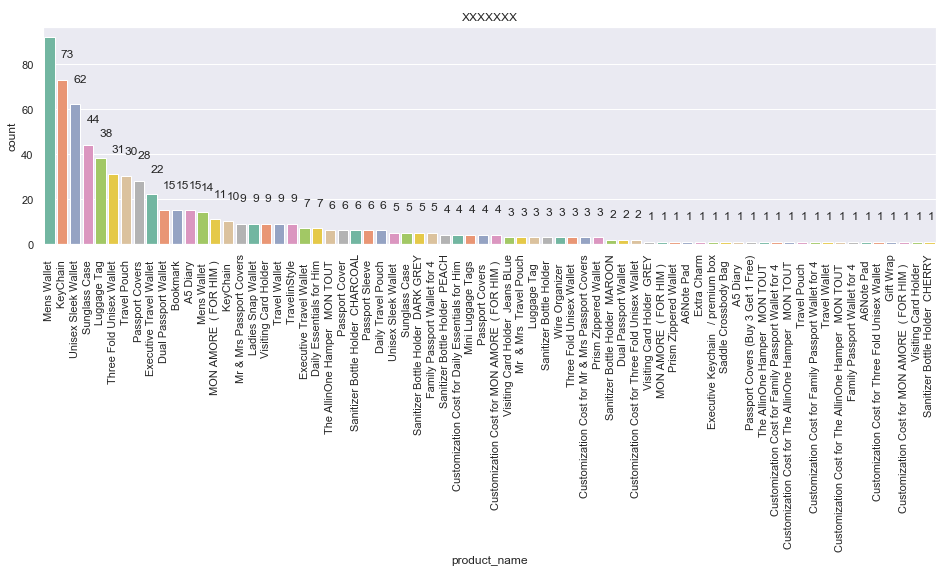

In [16]:
from matplotlib.pyplot import xticks
plt.figure(figsize=(16,4))
ax = sns.countplot(data['product_name'], order = data.product_name.value_counts().index, palette =  'Set2')
xticks(rotation = 90)
plt.title('XXXXXXX')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()+10))
plt.show()

In [17]:
to_replace = '|'.join(['BLACK','BROWN','CHARCOAL','TAN','CHERRY','GREY','DARK','BLUE','JEANS BLUE','PEACH','SKY','MAROON','ORANGE','-',"JEANS BLUE", 'GREY','set of 2','Black','Brown','Charcoal','Tan','Cherry','Grey','Dark','Blue','Jeans Blue','Peach','Sky','Maroon','Orange','-',"JEANS BLUE", 'grey','set of 2'])
data['Product_code'] = data['Product_code'].str.replace(to_replace,'')

In [18]:
data.head()

,Paid at,Fulfilled at,Price,Shipping Method,Quantity,product_name,Product_code,City,Billing Province,Name
0,2021-03-31 22:47:06 +0530,2021-03-31 23:30:56 +0530,650.0,Standard,1,Mens Wallet,TS14MW,ALUVA,KL,#TS2960
1,2021-03-31 22:36:09 +0530,2021-03-31 23:30:59 +0530,990.0,NaN,1,Unisex Sleek Wallet,TS12USW,Panvel,MH,#TS2959
2,NaN,NaN,NaN,NaN,1,Mens Wallet,TS14MW,NaN,NaN,#TS2959
3,2021-03-31 21:19:21 +0530,2021-03-31 23:35:26 +0530,750.0,Standard,1,Travel Pouch,TS08TP,HYDERABAD,TS,#TS2958
4,2021-03-31 21:08:41 +0530,2021-03-31 23:30:59 +0530,510.0,Default,1,Unisex Sleek Wallet,TS12USW,Sivasagar,AS,#TS2957


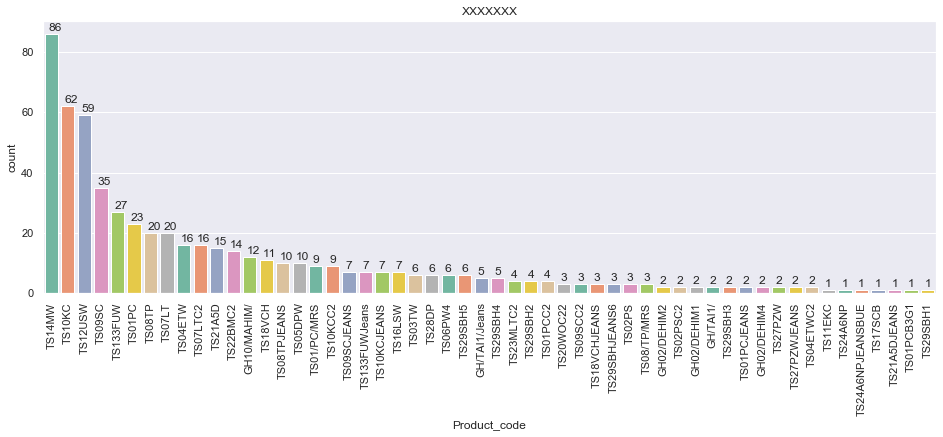

In [19]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data['Product_code'], order = data.Product_code.value_counts().index, palette =  'Set2')
xticks(rotation = 90)
plt.title('XXXXXXX')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
plt.show()

In [20]:
data['Price']= data['Price'].fillna(0)

In [21]:
price = data['Price']
price = price.tolist()
print(price)

[650.0, 990.0, 0.0, 750.0, 510.0, 550.0, 1400.0, 550.0, 0.0, 510.0, 650.0, 500.0, 0.0, 360.0, 650.0, 360.0, 360.0, 1100.0, 0.0, 360.0, 1037.0, 0.0, 550.0, 0.0, 1530.0, 420.0, 3150.0, 650.0, 510.0, 690.0, 0.0, 360.0, 1000.0, 0.0, 460.0, 500.0, 0.0, 650.0, 1080.0, 360.0, 360.0, 1755.0, 0.0, 0.0, 750.0, 650.0, 360.0, 650.0, 510.0, 360.0, 690.0, 0.0, 460.0, 750.0, 460.0, 1450.0, 4100.0, 0.0, 0.0, 0.0, 0.0, 600.0, 1305.0, 510.0, 660.0, 0.0, 950.0, 750.0, 945.0, 0.0, 360.0, 650.0, 750.0, 700.0, 960.0, 0.0, 0.0, 790.0, 0.0, 3150.0, 637.0, 650.0, 650.0, 550.0, 0.0, 1440.0, 0.0, 600.0, 690.0, 0.0, 637.0, 750.0, 650.0, 650.0, 950.0, 650.0, 650.0, 600.0, 360.0, 510.0, 1300.0, 0.0, 710.0, 0.0, 750.0, 690.0, 0.0, 1150.0, 650.0, 460.0, 650.0, 650.0, 360.0, 360.0, 550.0, 790.0, 0.0, 1200.0, 0.0, 0.0, 0.0, 690.0, 0.0, 360.0, 460.0, 690.0, 0.0, 360.0, 750.0, 637.0, 3150.0, 990.0, 0.0, 0.0, 360.0, 900.0, 0.0, 0.0, 550.0, 540.0, 1160.0, 0.0, 950.0, 600.0, 0.0, 937.0, 0.0, 1274.0, 0.0, 1260.0, 690.0, 0.0,

In [22]:
Total_sales = np.array([])

for gain in price:
    i = price.index(gain)
    
    total_sum = sum(price[:int(i)])
    Total_sales = np.append(Total_sales,total_sum)
print(Total_sales)

[     0.     650.    1640.    1640.    2390.    2900.    3450.    2900.
   1640.    2390.       0.    6560.    1640.    7060.       0.    7060.
   7060.    8790.    1640.    7060.   10250.    1640.    2900.    1640.
  11837.   13367.   13787.       0.    2390.   18097.    1640.    7060.
  19147.    1640.   20147.    6560.    1640.       0.   21757.    7060.
   7060.   23557.    1640.    1640.    1640.       0.    7060.       0.
   2390.    7060.   18097.    1640.   20147.    1640.   20147.   30952.
  32402.    1640.    1640.    1640.    1640.   36502.   37102.    2390.
  38917.    1640.   39577.    1640.   41277.    1640.    7060.       0.
   1640.   43982.   44682.    1640.    1640.   45642.    1640.   13787.
  49582.       0.       0.    2900.    1640.   52069.    1640.   36502.
  18097.    1640.   49582.    1640.       0.       0.   39577.       0.
      0.   36502.    7060.    2390.   61206.    1640.   62506.    1640.
   1640.   18097.    1640.   64656.       0.   20147.       0.  

In [ ]:
from catboost import CatBoostRegressor, Pool, cv
from catboost import MetricVisualizer
from scipy.stats import boxcox



import shap
shap.initjs()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
